Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read csv

In [3]:
df = pd.read_csv('../data/raw_facebook_data.csv', sep=";")

Drop NA values

In [4]:
df = df.dropna()
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

Convert Type Category into binary values using get_dummies method.

In [5]:
type_dummies = pd.get_dummies(df['Type'], dtype=int, drop_first=True)
type_dummies
df.drop('Type', axis=1, inplace=True) 
df = df.join(type_dummies)
df.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Photo,Status,Video
0,139441,2,12,4,3,0.0,2752,5091,178,109,...,3078,1640,119,4,79.0,17.0,100,1,0,0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,...,11710,6112,1108,5,130.0,29.0,164,0,1,0
2,139441,3,12,3,3,0.0,2413,4373,177,113,...,2812,1503,132,0,66.0,14.0,80,1,0,0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,...,61027,32048,1386,58,1572.0,147.0,1777,1,0,0
4,139441,2,12,2,3,0.0,7244,13594,671,410,...,6228,3200,396,19,325.0,49.0,393,1,0,0


Find correlation (r) between all features and the target; create a heatmap based on this

<Axes: >

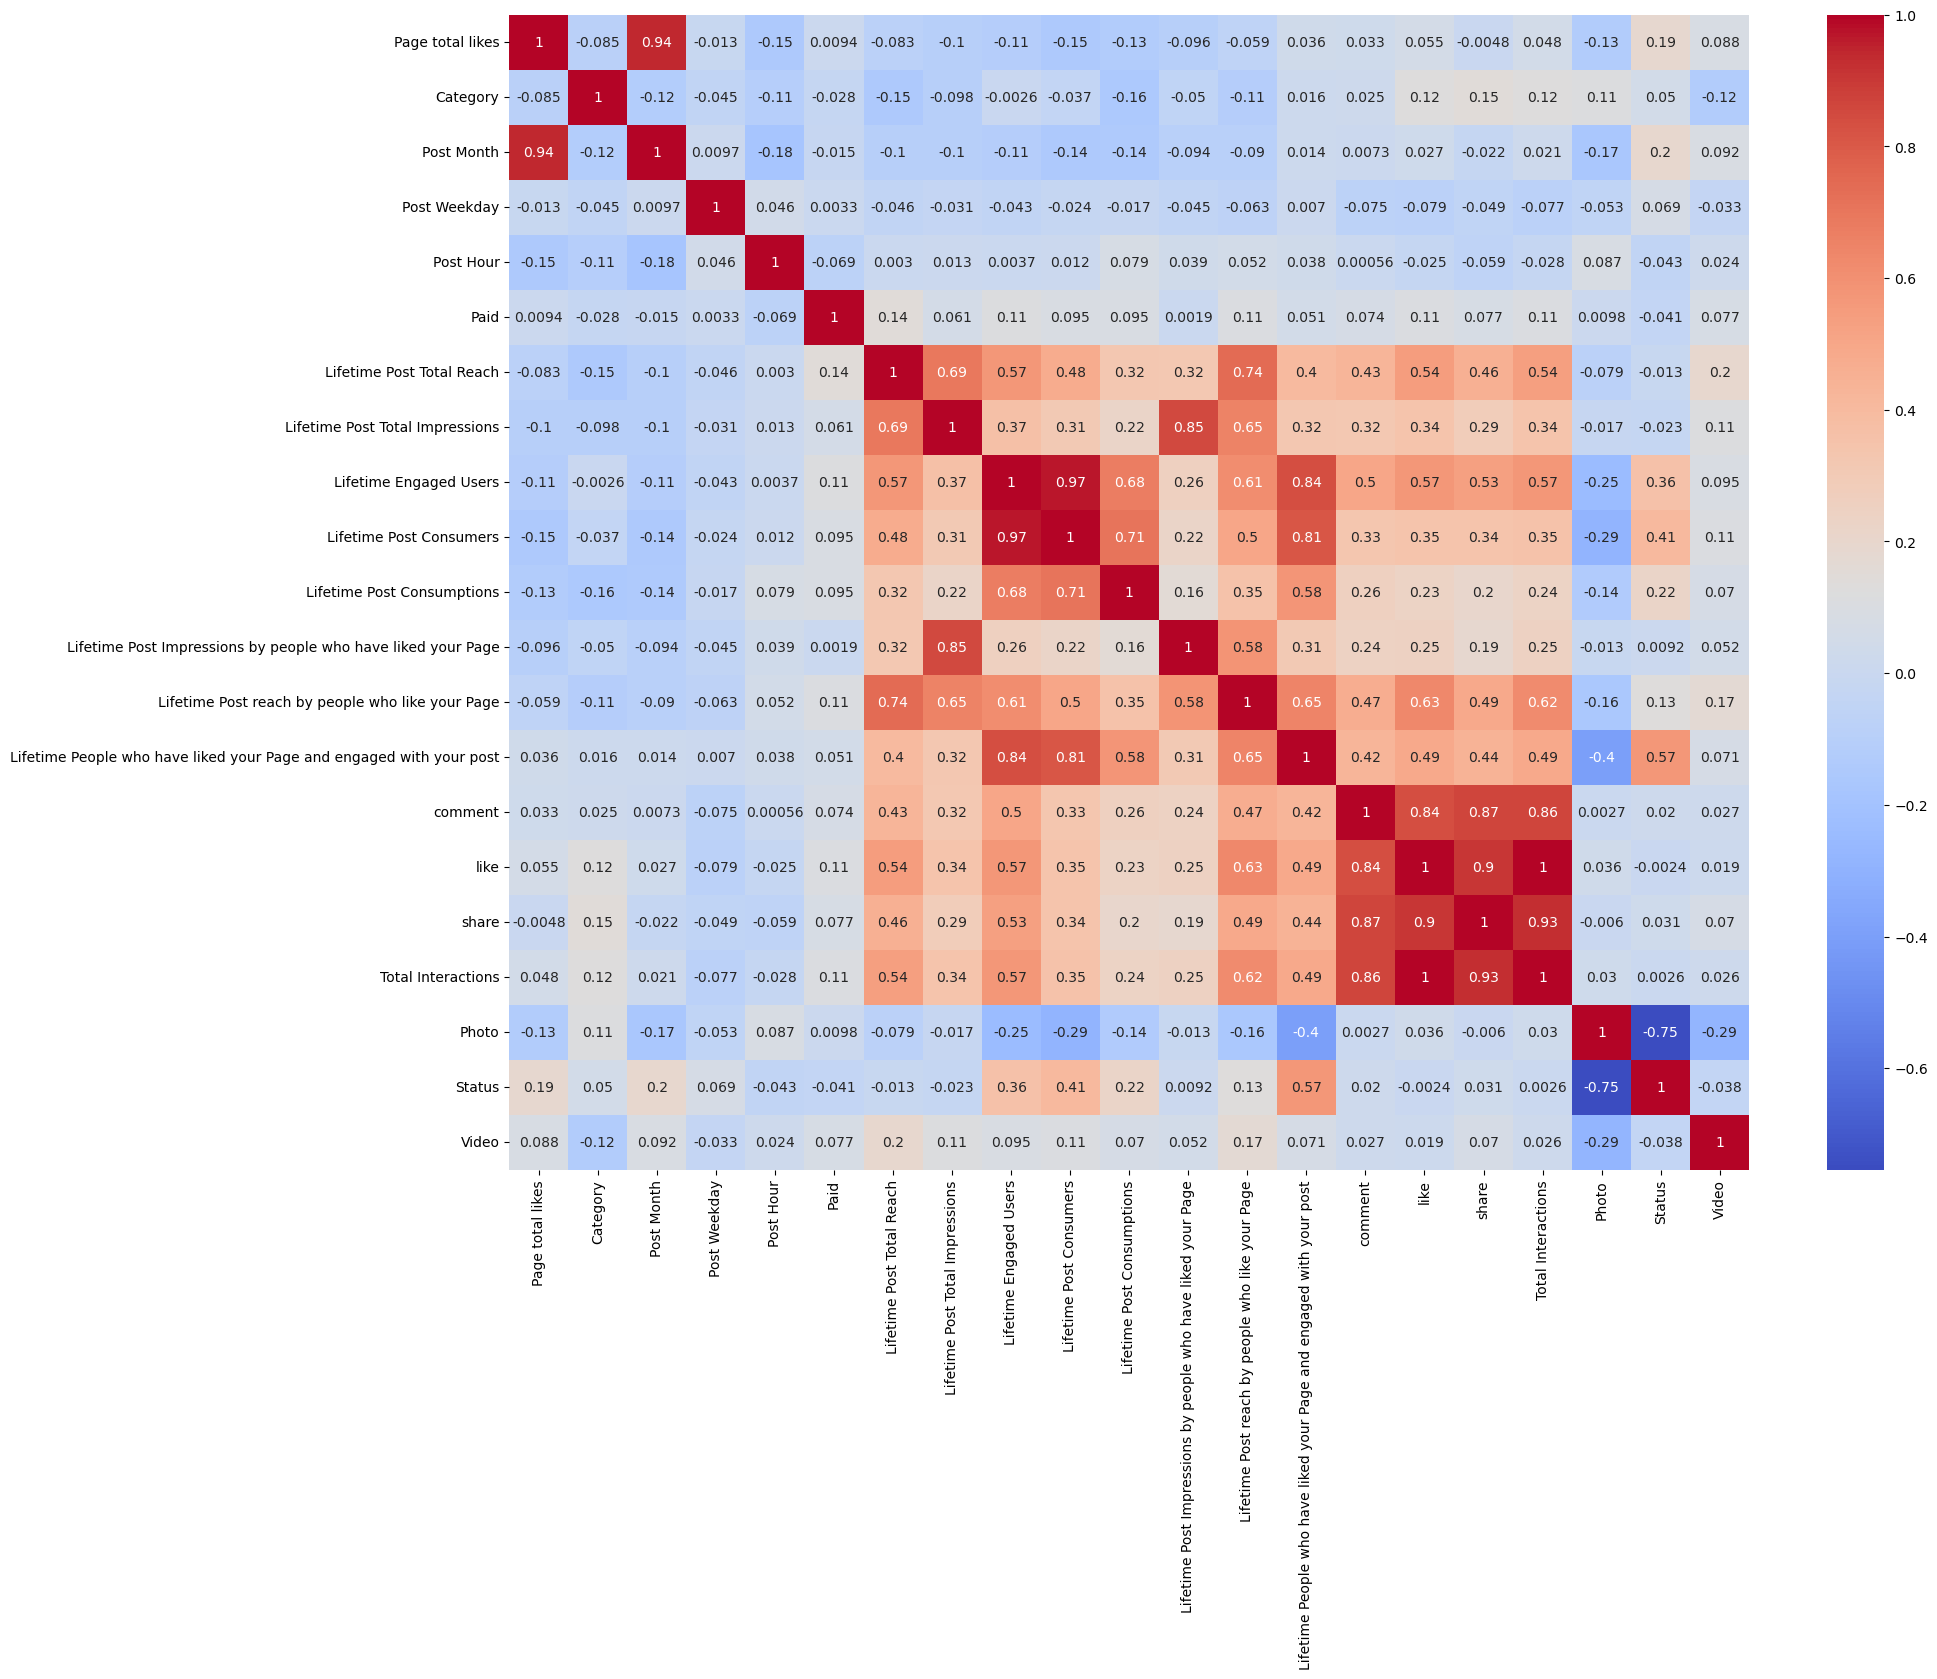

In [6]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True, cmap='coolwarm')

There's a strong correlation between the target and like, comment, and share. We could either drop them or add them up but these independent variables are pretty important, so we could either use regularization or ignore them. We'll use regularization to deprioritize these features.

Looking at the absolute values of coefficients are important, so all the more reason to use regularization. 

NOTE: R above 0.50 or -0.50 should be looked into.